In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
taitanic_train = pd.read_csv("train.csv")
taitanic_test = pd.read_csv("test.csv")

In [3]:
taitanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
taitanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
taitanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
taitanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
taitanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
taitanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
taitanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
taitanic_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
columns_of_taitanic_train = taitanic_train.columns
columns_of_taitanic_test = taitanic_test.columns

print(f"Columns of taitanic_train is : {columns_of_taitanic_train}\nColumns of taitanic_test is : {columns_of_taitanic_test}")

Columns of taitanic_train is : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns of taitanic_test is : Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
for i in columns_of_taitanic_train:
    print(taitanic_train[i].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [13]:
for i in columns_of_taitanic_test:
    print(taitanic_test[i].unique())

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 

In [14]:
taitanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
taitanic_test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [16]:
taitanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
taitanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

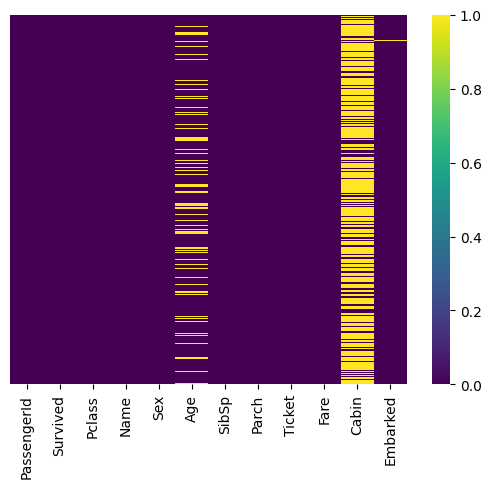

In [18]:
sns.heatmap(taitanic_train.isnull(), yticklabels= False, cbar= True, cmap= "viridis")

<Axes: >

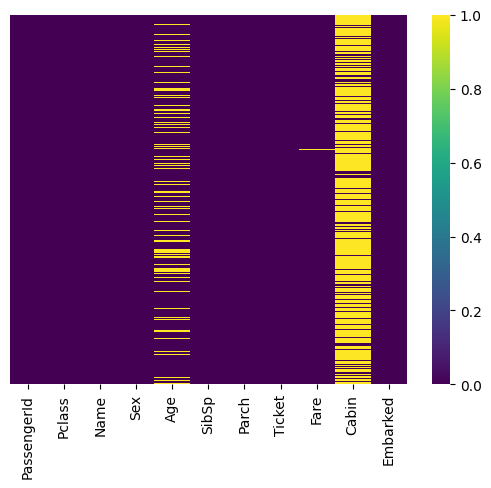

In [19]:
sns.heatmap(taitanic_test.isnull(), yticklabels= False, cbar= True, cmap= "viridis")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\3080449302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= taitanic_train, x= "Survived", palette= "husl")


<Axes: xlabel='Survived', ylabel='count'>

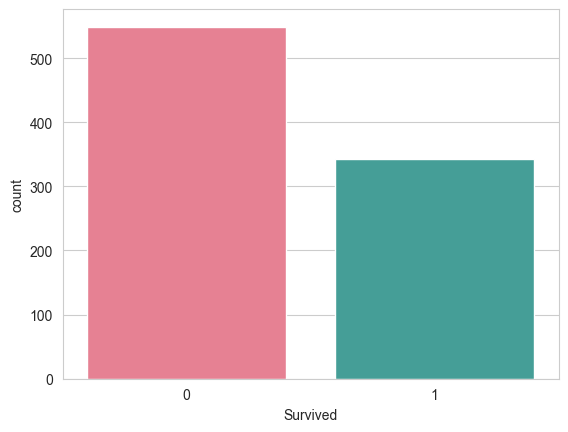

In [20]:
sns.set_style("whitegrid")
sns.countplot(data= taitanic_train, x= "Survived", palette= "husl")

<Axes: xlabel='Survived', ylabel='count'>

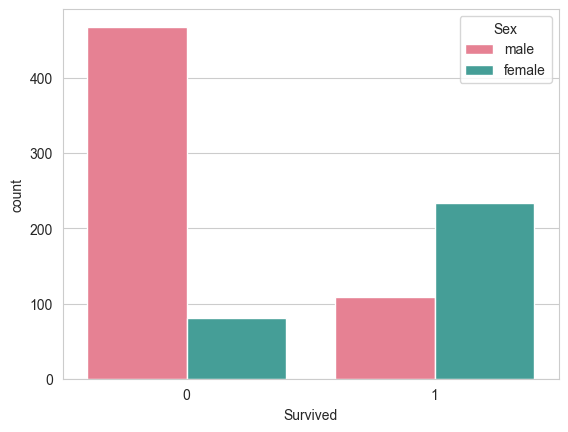

In [21]:
sns.set_style("whitegrid")
sns.countplot(data= taitanic_train, x= "Survived", hue= "Sex", palette= "husl")

<Axes: xlabel='Survived', ylabel='count'>

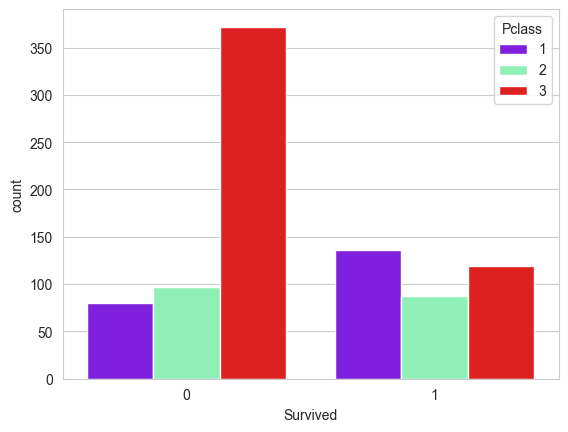

In [22]:
sns.set_style("whitegrid")
sns.countplot(data= taitanic_train, x= "Survived", hue= "Pclass", palette= "rainbow")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\885338059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= taitanic_train, x= "Pclass", palette= "rainbow")


<Axes: xlabel='Pclass', ylabel='count'>

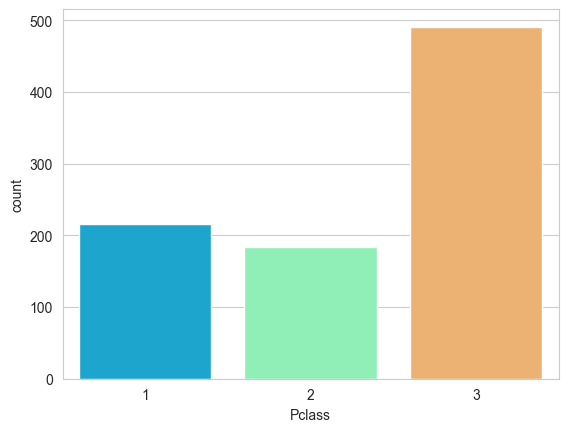

In [23]:
sns.set_style("whitegrid")
sns.countplot(data= taitanic_train, x= "Pclass", palette= "rainbow")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\4131745852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= taitanic_test, x= "Pclass", palette= "rainbow")


<Axes: xlabel='Pclass', ylabel='count'>

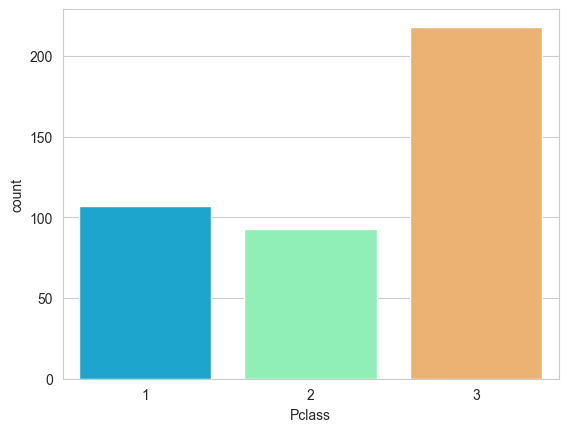

In [24]:
sns.set_style("whitegrid")
sns.countplot(data= taitanic_test, x= "Pclass", palette= "rainbow")

<Axes: xlabel='Pclass', ylabel='count'>

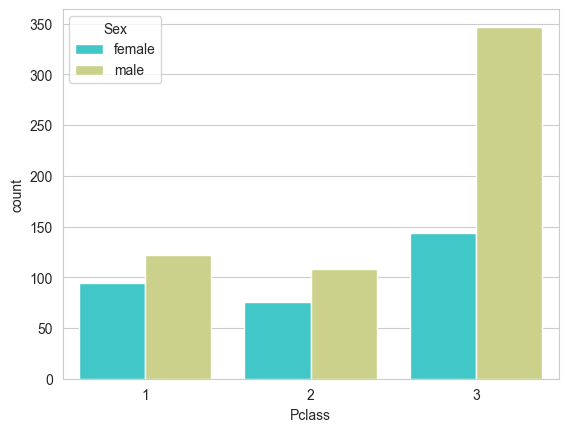

In [25]:
sns.set_style("whitegrid")
sns.countplot(data= taitanic_train, x= "Pclass", hue= "Sex", palette= "rainbow")

<Axes: xlabel='Pclass', ylabel='count'>

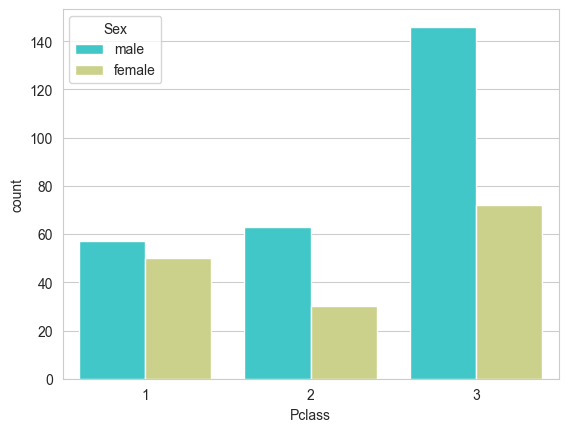

In [26]:
sns.set_style("whitegrid")
sns.countplot(data= taitanic_test, x= "Pclass", hue= "Sex", palette= "rainbow")

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


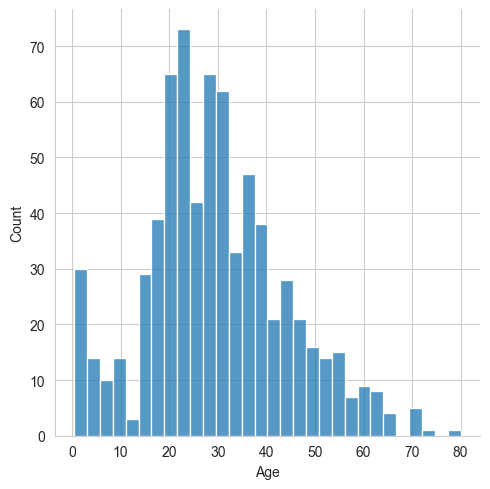

In [27]:
sns.displot(taitanic_train["Age"].dropna(), bins= 30)

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


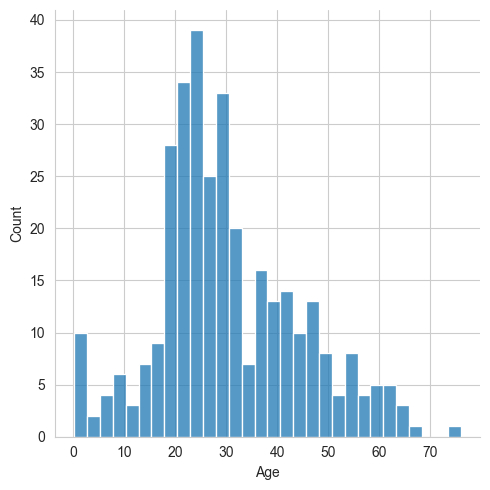

In [28]:
sns.displot(taitanic_test["Age"].dropna(), bins= 30)

<Axes: ylabel='Frequency'>

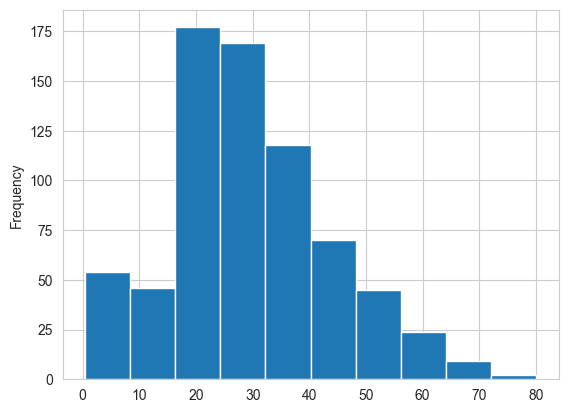

In [29]:
# pandas plot

taitanic_train["Age"].plot.hist()

<Axes: ylabel='Frequency'>

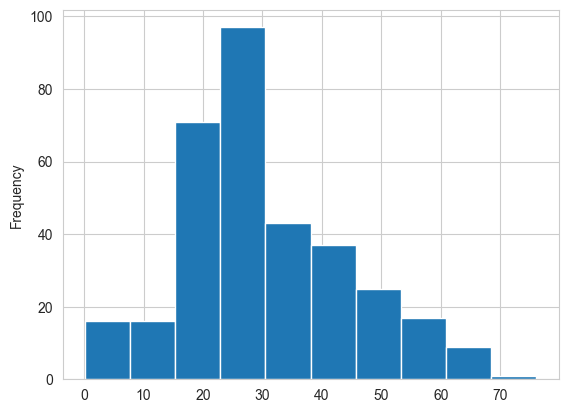

In [30]:
# pandas plot

taitanic_test["Age"].plot.hist()

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\3479538904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= taitanic_train, x= "SibSp", palette= "Spectral")


<Axes: xlabel='SibSp', ylabel='count'>

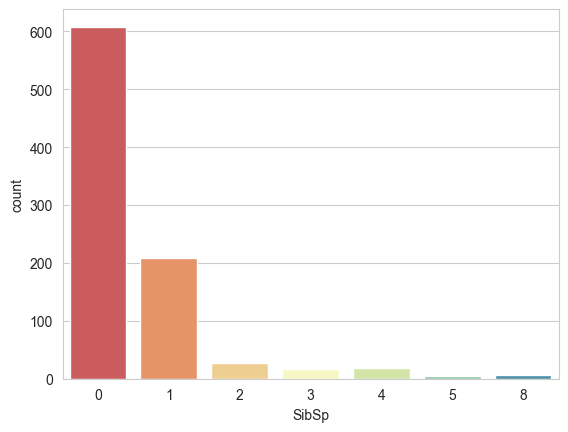

In [31]:
sns.countplot(data= taitanic_train, x= "SibSp", palette= "Spectral")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\341816635.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= taitanic_test, x= "SibSp", palette= "Spectral")


<Axes: xlabel='SibSp', ylabel='count'>

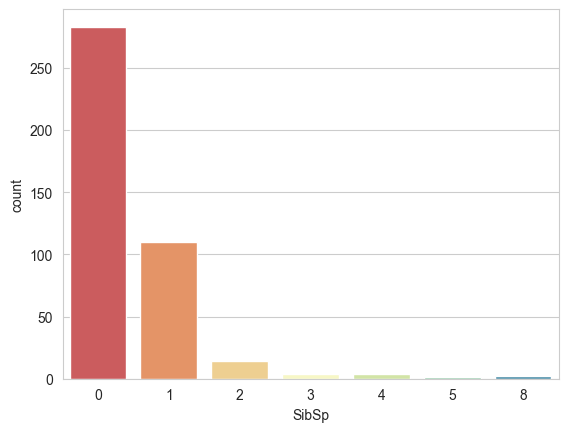

In [32]:
sns.countplot(data= taitanic_test, x= "SibSp", palette= "Spectral")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\3946046882.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= taitanic_train, x= "Parch", palette= "husl")


<Axes: xlabel='Parch', ylabel='count'>

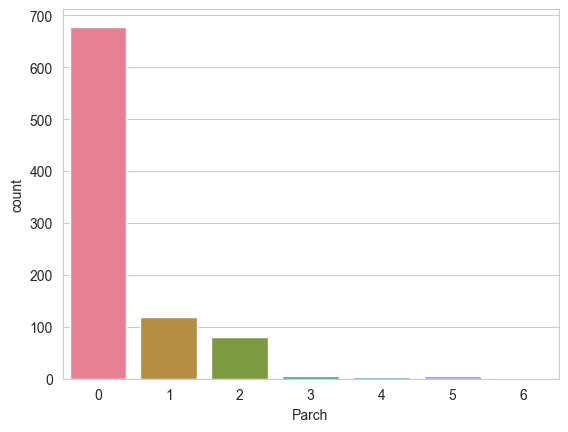

In [33]:
sns.countplot(data= taitanic_train, x= "Parch", palette= "husl")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\483805040.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= taitanic_test, x= "Parch", palette= "husl")


<Axes: xlabel='Parch', ylabel='count'>

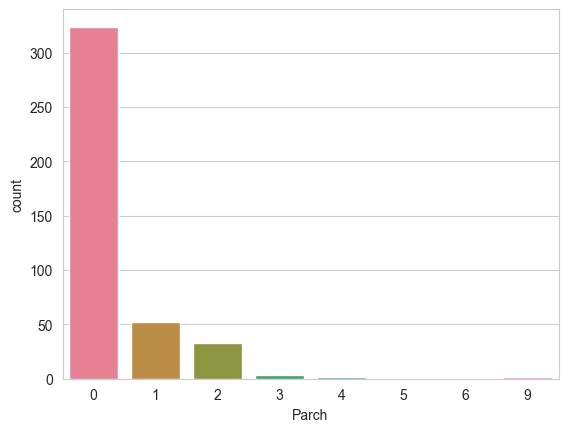

In [34]:
sns.countplot(data= taitanic_test, x= "Parch", palette= "husl")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\371119889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= taitanic_train, x= "Pclass", y= "Age", palette= "flare")


<Axes: xlabel='Pclass', ylabel='Age'>

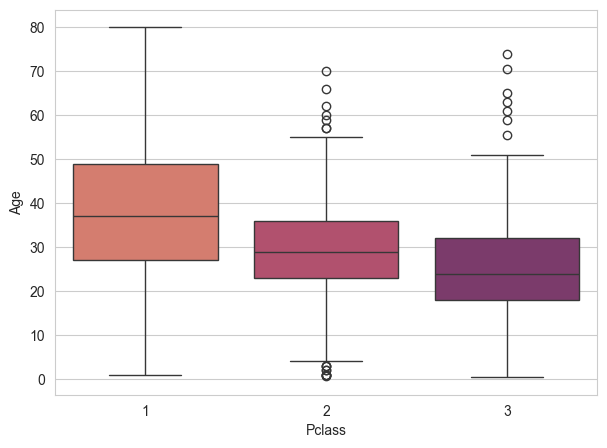

In [35]:
plt.figure(figsize= (7, 5))
sns.boxplot(data= taitanic_train, x= "Pclass", y= "Age", palette= "flare")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\1670609486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= taitanic_test, x= "Pclass", y= "Age", palette= "husl")


<Axes: xlabel='Pclass', ylabel='Age'>

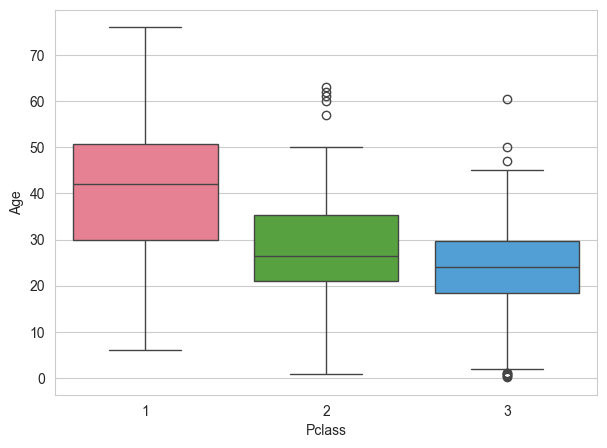

In [36]:
plt.figure(figsize= (7, 5))
sns.boxplot(data= taitanic_test, x= "Pclass", y= "Age", palette= "husl")

In [37]:
taitanic_train[taitanic_train["Pclass"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [38]:
taitanic_train[taitanic_train["Pclass"] == 1]["Age"]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

In [39]:
taitanic_test[taitanic_test["Pclass"] == 1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [40]:
taitanic_test[taitanic_test["Pclass"] == 1]["Age"]

11     46.0
12     23.0
14     47.0
20     55.0
22      NaN
       ... 
403    17.0
404    43.0
407    50.0
411    37.0
414    39.0
Name: Age, Length: 107, dtype: float64

In [41]:
print("Average Age of class = 1 in taitanic_train is : ", taitanic_train[taitanic_train["Pclass"] == 1]["Age"].mean())
print("Round Average Age of class = 1 in taitanic_train is : ", np.round(taitanic_train[taitanic_train["Pclass"] == 1]["Age"].mean()))

Average Age of class = 1 in taitanic_train is :  38.233440860215055
Round Average Age of class = 1 in taitanic_train is :  38.0


In [42]:
print("Average Age of class = 1 in taitanic_test is : ", taitanic_train[taitanic_train["Pclass"] == 1]["Age"].mean())
print("Round Average Age of class = 1 in taitanic_test is : ", np.round(taitanic_train[taitanic_train["Pclass"] == 1]["Age"].mean()))

Average Age of class = 1 in taitanic_test is :  38.233440860215055
Round Average Age of class = 1 in taitanic_test is :  38.0


In [43]:
print("Average Age of class = 2 in taitanic_train is : ", taitanic_train[taitanic_train["Pclass"] == 2]["Age"].mean())
print("Round Average Age of class = 2 in taitanic_train is : ", np.round(taitanic_train[taitanic_train["Pclass"] == 2]["Age"].mean()))

Average Age of class = 2 in taitanic_train is :  29.87763005780347
Round Average Age of class = 2 in taitanic_train is :  30.0


In [44]:
print("Average Age of class = 2 in taitanic_test is : ", taitanic_train[taitanic_train["Pclass"] == 2]["Age"].mean())
print("Round Average Age of class = 2 in taitanic_test is : ", np.round(taitanic_train[taitanic_train["Pclass"] == 2]["Age"].mean()))

Average Age of class = 2 in taitanic_test is :  29.87763005780347
Round Average Age of class = 2 in taitanic_test is :  30.0


In [45]:
print("Average Age of class = 3 in taitanic_train is : ", taitanic_train[taitanic_train["Pclass"] == 3]["Age"].mean())
print("Round Average Age of class = 3 in taitanic_train is : ", np.round(taitanic_train[taitanic_train["Pclass"] == 3]["Age"].mean()))

Average Age of class = 3 in taitanic_train is :  25.14061971830986
Round Average Age of class = 3 in taitanic_train is :  25.0


In [46]:
print("Average Age of class = 3 in taitanic_test is : ", taitanic_train[taitanic_train["Pclass"] == 3]["Age"].mean())
print("Round Average Age of class = 3 in taitanic_test is : ", np.round(taitanic_train[taitanic_train["Pclass"] == 3]["Age"].mean()))

Average Age of class = 3 in taitanic_test is :  25.14061971830986
Round Average Age of class = 3 in taitanic_test is :  25.0


In [47]:
def fillna_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
            
        elif Pclass == 2:
            return 29
            
        else:
            return 25
            
    else:
        return Age

In [48]:
taitanic_train["Age"] = taitanic_train[["Age", "Pclass"]].apply(fillna_age, axis= 1)
taitanic_test["Age"] = taitanic_test[["Age", "Pclass"]].apply(fillna_age, axis= 1)

C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\2304396231.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\2304396231.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\2304396231.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\H_PC\AppData\Local\Temp\ipykernel_9512\2304396231

<Axes: >

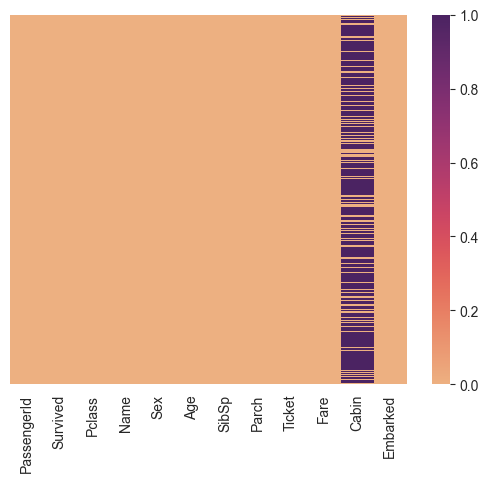

In [49]:
sns.heatmap(taitanic_train.isnull(), yticklabels= False, cbar= True, cmap= "flare")

<Axes: >

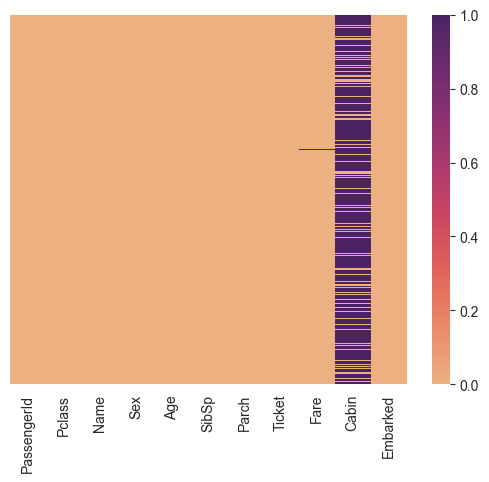

In [50]:
sns.heatmap(taitanic_test.isnull(), yticklabels= False, cbar= True, cmap= "flare")

In [51]:
taitanic_train.drop("Cabin", axis= 1, inplace= True)
taitanic_test.drop("Cabin", axis= 1, inplace= True)

In [52]:
taitanic_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [53]:
taitanic_train["Embarked"].replace(np.nan, "S", inplace= True)

In [54]:
taitanic_test["Fare"].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [55]:
avg_fare = taitanic_test["Fare"].mean()
avg_fare

35.627188489208635

In [56]:
taitanic_test["Fare"].replace(np.nan, avg_fare, inplace= True)

In [57]:
taitanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [58]:
taitanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [59]:
taitanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
taitanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [61]:
taitanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [62]:
taitanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S
417,1309,3,"Peter, Master. Michael J",male,25.0,1,1,2668,22.3583,C


In [63]:
sex_train = pd.get_dummies(taitanic_train["Sex"], drop_first= True)
sex_train

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [64]:
sex_test = pd.get_dummies(taitanic_test["Sex"], drop_first= True)
sex_test

,male
0,True
1,False
2,True
3,True
4,False
...,...
413,True
414,False
415,True
416,True


In [65]:
embark_train = pd.get_dummies(taitanic_train["Embarked"], drop_first= True)
embark_train

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [66]:
embark_test = pd.get_dummies(taitanic_test["Embarked"], drop_first= True)
embark_test

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
413,False,True
414,False,False
415,False,True
416,False,True


In [67]:
p_class_train = pd.get_dummies(taitanic_train["Pclass"], drop_first= True)
p_class_train

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
886,True,False
887,False,False
888,False,True
889,False,False


In [68]:
p_class_test = pd.get_dummies(taitanic_test["Pclass"], drop_first= True)
p_class_test

,2,3
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
413,False,True
414,False,False
415,False,True
416,False,True


In [69]:
taitanic_train.drop(["PassengerId", "Sex", "Embarked", "Name", "Ticket", "Pclass"], axis= 1, inplace= True)
taitanic_test.drop(["PassengerId", "Sex", "Embarked", "Name", "Ticket", "Pclass"], axis= 1, inplace= True)

In [70]:
taitanic_train = pd.concat([taitanic_train, sex_train, embark_train, p_class_train], axis= 1)

In [71]:
taitanic_test = pd.concat([taitanic_test, sex_test, embark_test, p_class_test], axis= 1)

In [72]:
taitanic_train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [73]:
taitanic_train.tail()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
886,0,27.0,0,0,13.00,True,False,True,True,False
887,1,19.0,0,0,30.00,False,False,True,False,False
888,0,25.0,1,2,23.45,False,False,True,False,True
889,1,26.0,0,0,30.00,True,False,False,False,False
890,0,32.0,0,0,7.75,True,True,False,False,True


In [74]:
taitanic_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,True,True,False,False,True
1,47.0,1,0,7.0000,False,False,True,False,True
2,62.0,0,0,9.6875,True,True,False,True,False
3,27.0,0,0,8.6625,True,False,True,False,True
4,22.0,1,1,12.2875,False,False,True,False,True


In [75]:
taitanic_test.tail()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
413,25.0,0,0,8.0500,True,False,True,False,True
414,39.0,0,0,108.9000,False,False,False,False,False
415,38.5,0,0,7.2500,True,False,True,False,True
416,25.0,0,0,8.0500,True,False,True,False,True
417,25.0,1,1,22.3583,True,False,False,False,True


In [76]:
taitanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   male      891 non-null    bool   
 6   Q         891 non-null    bool   
 7   S         891 non-null    bool   
 8   2         891 non-null    bool   
 9   3         891 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 39.3 KB


In [77]:
taitanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    418 non-null    float64
 4   male    418 non-null    bool   
 5   Q       418 non-null    bool   
 6   S       418 non-null    bool   
 7   2       418 non-null    bool   
 8   3       418 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 15.2 KB


In [78]:
taitanic_train.dtypes

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male           bool
Q              bool
S              bool
2              bool
3              bool
dtype: object

In [79]:
taitanic_test.dtypes

Age      float64
SibSp      int64
Parch      int64
Fare     float64
male        bool
Q           bool
S           bool
2           bool
3           bool
dtype: object

In [80]:
taitanic_train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [81]:
taitanic_train.columns.astype(str)

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2',
       '3'],
      dtype='object')

In [82]:
taitanic_test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [83]:
taitanic_test.columns.astype(str)

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2', '3'], dtype='object')

In [84]:
X = taitanic_train.drop("Survived", axis= 1)
y = taitanic_train["Survived"]

In [85]:
X

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,True,False,True,False,True
1,38.0,1,0,71.2833,False,False,False,False,False
2,26.0,0,0,7.9250,False,False,True,False,True
3,35.0,1,0,53.1000,False,False,True,False,False
4,35.0,0,0,8.0500,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,True,False,True,True,False
887,19.0,0,0,30.0000,False,False,True,False,False
888,25.0,1,2,23.4500,False,False,True,False,True
889,26.0,0,0,30.0000,True,False,False,False,False


In [86]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [87]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [88]:
X.columns = X.columns.astype(str)

In [89]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2', '3'], dtype='object')

In [90]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [91]:
X_test = taitanic_test

In [92]:
X_test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [93]:
X_test.columns = X_test.columns.astype(str)

In [94]:
X_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,True,True,False,False,True
1,47.0,1,0,7.0000,False,False,True,False,True
2,62.0,0,0,9.6875,True,True,False,True,False
3,27.0,0,0,8.6625,True,False,True,False,True
4,22.0,1,1,12.2875,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
413,25.0,0,0,8.0500,True,False,True,False,True
414,39.0,0,0,108.9000,False,False,False,False,False
415,38.5,0,0,7.2500,True,False,True,False,True
416,25.0,0,0,8.0500,True,False,True,False,True


In [95]:
X_train = X
y_train = y

In [96]:
LR = LogisticRegression()

In [97]:
LR.fit(X_train, y_train)

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

LogisticRegression()

In [98]:
Prediction = LR.predict(X_test)
Prediction

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,